# 4. Exploratory Data Analysis

**탐색적 데이터 분석을 통해 데이터를 통달해봅시다.** with [Titanic Data](https://www.kaggle.com/c/titanic)

0. 라이브러리 준비
1. 분석의 목적과 변수 확인
2. 데이터 전체적으로 살펴보기
3. 데이터의 개별 속성 파악하기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 0. 라이브러리 준비

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. 분석의 목적과 변수 확인

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/github/week3/train.csv')
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## 2. 데이터 전체적으로 살펴보기

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 3. 데이터의 개별 속성 파악하기

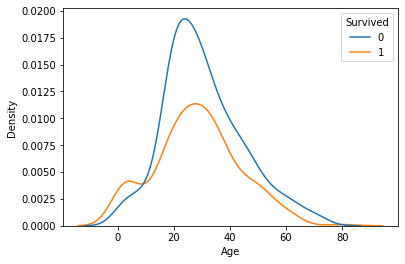

In [20]:
sns.kdeplot(x=df['Age'], hue=df['Survived'])
plt.show()

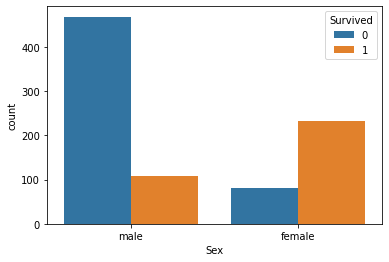

In [21]:
sns.countplot(x=df['Sex'], hue=df['Survived'])
plt.show()

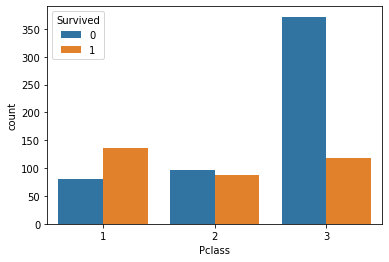

In [22]:
sns.countplot(x=df['Pclass'], hue=df['Survived'])
plt.show()

## Mission : It's Your Turn!

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? Sibsp? Parch?

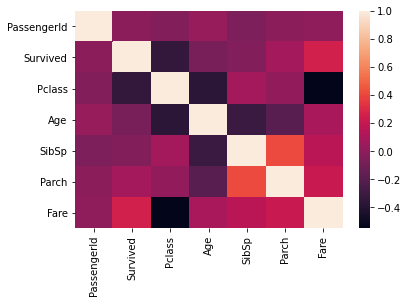

In [23]:
sns.heatmap(df.corr())

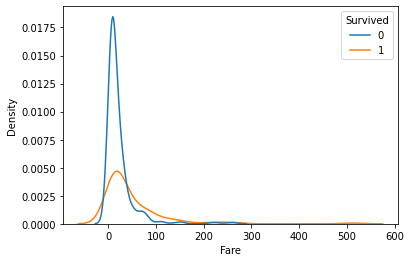

In [24]:
sns.kdeplot(x=df['Fare'], hue=df['Survived'])
plt.show()

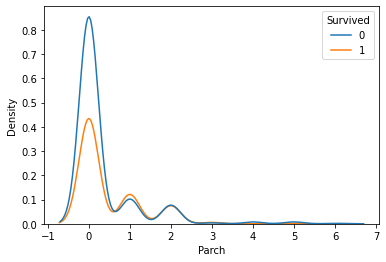

In [25]:
sns.kdeplot(x=df['Parch'], hue=df['Survived'])
plt.show()

### 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

함께 보면 좋은 라이브러리 document
- [numpy]()
- [pandas]()
- [seaborn]()
- [matplotlib]()

In [27]:
testdf = pd.read_csv('/content/sample_data/california_housing_test.csv')
testdf.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0


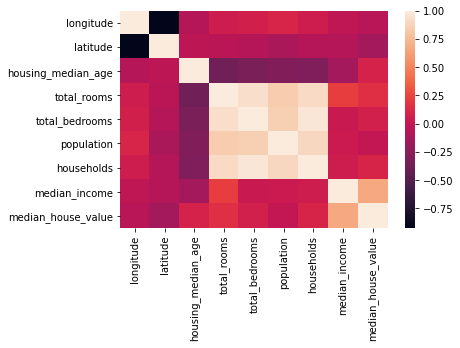

In [29]:
sns.heatmap(testdf.corr())

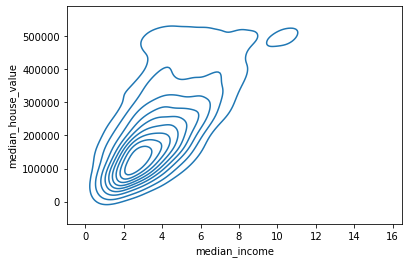

In [32]:
sns.kdeplot(x=testdf['median_income'], y=testdf['median_house_value'])
plt.show()

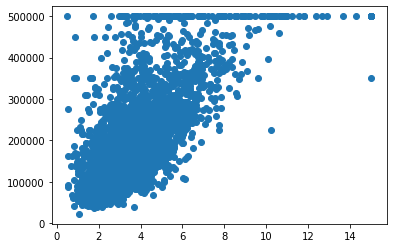

In [33]:
plt.scatter(x=testdf['median_income'], y=testdf['median_house_value'])
plt.show()

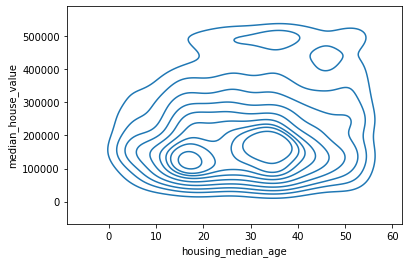

In [39]:
sns.kdeplot(x=testdf['housing_median_age'], y=testdf['median_house_value'])
plt.show()

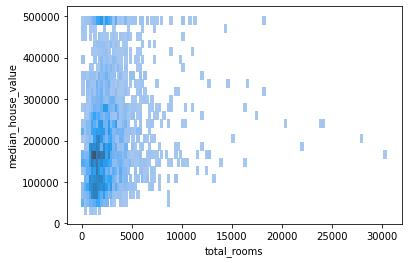

In [45]:
sns.histplot(x=testdf['total_rooms'], bins='auto',y=testdf['median_house_value'])
plt.show()